# UTS


### Klasifikasi Data Pada Dataset Breats Cancer

Lakukan analisa terhadap data pada
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi

 - Metode KNN

 - Metode pohon keputusan (Desision tree)

## Data

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import cv2 as cv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt 


In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/LALA09-erha/datamining/gh-pages/dataR2.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### Ubah Label  1=Healthy controls dan 2=Patients

In [29]:
data['Classification'] = data['Classification'].apply({1:'Healthy controls', 2:'Patients'}.get)
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Healthy controls
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Healthy controls
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Healthy controls
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Healthy controls
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Healthy controls
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,Patients
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,Patients
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,Patients
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,Patients


In [13]:
type(data)

pandas.core.frame.DataFrame

## **Metode KNN Clafification**

split data

In [10]:
data.shape

(116, 10)

memisahkan data dengan kelas ke dalam dua variabel, X dan y


In [11]:
X = data.drop(columns=["Classification"])
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [12]:
#separate target values
y = data["Classification"].values
#view target values
y[0:150]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

### Memisahkan Data Training dan Test

In [14]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### membuat Model 

Dengan menetapkan N = 3 atau 3 tetangga

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Melakukan testing data pada model

In [16]:
#show first 5 model predictions on the test data
knn.predict(X_test)[1:25]

array([2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2])

### Menghitung akurasi yang didapat

In [17]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

### Melakukan K-Fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=6)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.45833333 0.60869565 0.47826087 0.43478261 0.43478261]
cv_scores mean:0.4829710144927536


### Hypertuning model parameters menggunakan GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

### Mengecek `n` yang terbaik

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

### Mengecek Hasil dari `n` yang terbaik

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

### Kesimpulan

Dari Hasil diatas bahwa n yang terbaik yaitu 23 dengan hasil 0.5688405797101449


## **Metode Decision Tree**

In [22]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### Membuat Model Clasifier Decision Tree

In [23]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

### Membuat Grafik Decision Tree dari hasil Klasifikasi

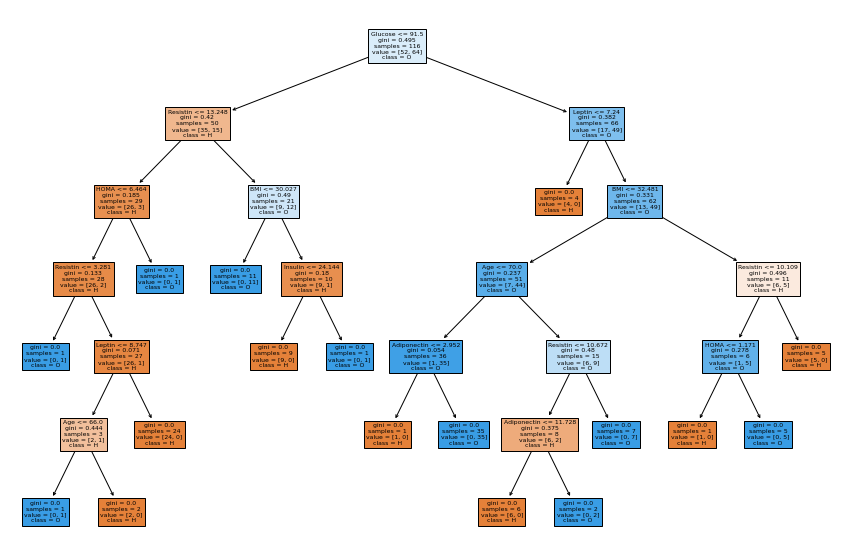

In [24]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[4] ,filled=True)